In [1]:
import re

In [2]:
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO

In [9]:
def convert_pdf_to_txt(path):
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos=set()

    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,caching=caching, check_extractable=True):
        interpreter.process_page(page)

    text = retstr.getvalue()

    fp.close()
    device.close()
    retstr.close()
    return text

In [11]:
Document=convert_pdf_to_txt('10K.pdf')

In [12]:
f=open('Finance10k.txt','w')
f.write(Document)
f.close()

In [13]:
with open('Finance10k.txt') as f:
    clean_cont = f.read().splitlines()

In [14]:
clean_cont

['UNITED STATES',
 ' ',
 '',
 'SECURITIES AND EXCHANGE COMMISSION',
 ' ',
 '',
 'Washington, D.C. 20549',
 ' ',
 '',
 '\xa0',
 'FORM ',
 '\xa0',
 '',
 'QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(d) OF',
 ' ',
 '',
 'THE SECURITIES EXCHANGE ACT OF 1934',
 ' ',
 'For the quarterly period ended September\xa030, 2016',
 ' ',
 ' ',
 '',
 'Commission file number 001-2979',
 ' ',
 '',
 '\xa0',
 '',
 '\xa0',
 '',
 'WELLS FARGO & COMPANY ',
 '',
 '(Exact name of registrant as specified in its charter) ',
 '',
 'Delaware ',
 '',
 '(State of incorporation) ',
 '',
 'No. 41-0449260 ',
 '',
 '(I.R.S. Employer Identification No.) ',
 '',
 '\xa0',
 '',
 '420 Montgomery Street, San Francisco, California 94163 ',
 '',
 '(Address of principal executive offices)\xa0 (Zip Code) ',
 '',
 '\xa0',
 '',
 'Registrant’s telephone number, including area code:\xa0 1-866-249-3302\xa0',
 '',
 '\xa0',
 'Indicate by check mark whether the registrant (1) has filed all reports required to be filed by Section 13 or 1

In [16]:
doc=[i.replace('\xe2\x80\x9c','') for i in clean_cont ]
doc=[i.replace('\xe2\x80\x9d','') for i in doc ]
doc=[i.replace('\xe2\x80\x99s','') for i in doc ]

docs = [x for x in doc if x != ' ']
docss = [x for x in docs if x != '']

In [17]:
doc

['UNITED STATES',
 ' ',
 '',
 'SECURITIES AND EXCHANGE COMMISSION',
 ' ',
 '',
 'Washington, D.C. 20549',
 ' ',
 '',
 '\xa0',
 'FORM ',
 '\xa0',
 '',
 'QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(d) OF',
 ' ',
 '',
 'THE SECURITIES EXCHANGE ACT OF 1934',
 ' ',
 'For the quarterly period ended September\xa030, 2016',
 ' ',
 ' ',
 '',
 'Commission file number 001-2979',
 ' ',
 '',
 '\xa0',
 '',
 '\xa0',
 '',
 'WELLS FARGO & COMPANY ',
 '',
 '(Exact name of registrant as specified in its charter) ',
 '',
 'Delaware ',
 '',
 '(State of incorporation) ',
 '',
 'No. 41-0449260 ',
 '',
 '(I.R.S. Employer Identification No.) ',
 '',
 '\xa0',
 '',
 '420 Montgomery Street, San Francisco, California 94163 ',
 '',
 '(Address of principal executive offices)\xa0 (Zip Code) ',
 '',
 '\xa0',
 '',
 'Registrant’s telephone number, including area code:\xa0 1-866-249-3302\xa0',
 '',
 '\xa0',
 'Indicate by check mark whether the registrant (1) has filed all reports required to be filed by Section 13 or 1

In [18]:
docs

['UNITED STATES',
 '',
 'SECURITIES AND EXCHANGE COMMISSION',
 '',
 'Washington, D.C. 20549',
 '',
 '\xa0',
 'FORM ',
 '\xa0',
 '',
 'QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(d) OF',
 '',
 'THE SECURITIES EXCHANGE ACT OF 1934',
 'For the quarterly period ended September\xa030, 2016',
 '',
 'Commission file number 001-2979',
 '',
 '\xa0',
 '',
 '\xa0',
 '',
 'WELLS FARGO & COMPANY ',
 '',
 '(Exact name of registrant as specified in its charter) ',
 '',
 'Delaware ',
 '',
 '(State of incorporation) ',
 '',
 'No. 41-0449260 ',
 '',
 '(I.R.S. Employer Identification No.) ',
 '',
 '\xa0',
 '',
 '420 Montgomery Street, San Francisco, California 94163 ',
 '',
 '(Address of principal executive offices)\xa0 (Zip Code) ',
 '',
 '\xa0',
 '',
 'Registrant’s telephone number, including area code:\xa0 1-866-249-3302\xa0',
 '',
 '\xa0',
 'Indicate by check mark whether the registrant (1) has filed all reports required to be filed by Section 13 or 15(d) of the Securities ',
 'Exchange Act of 1934

In [19]:
docss

['UNITED STATES',
 'SECURITIES AND EXCHANGE COMMISSION',
 'Washington, D.C. 20549',
 '\xa0',
 'FORM ',
 '\xa0',
 'QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(d) OF',
 'THE SECURITIES EXCHANGE ACT OF 1934',
 'For the quarterly period ended September\xa030, 2016',
 'Commission file number 001-2979',
 '\xa0',
 '\xa0',
 'WELLS FARGO & COMPANY ',
 '(Exact name of registrant as specified in its charter) ',
 'Delaware ',
 '(State of incorporation) ',
 'No. 41-0449260 ',
 '(I.R.S. Employer Identification No.) ',
 '\xa0',
 '420 Montgomery Street, San Francisco, California 94163 ',
 '(Address of principal executive offices)\xa0 (Zip Code) ',
 '\xa0',
 'Registrant’s telephone number, including area code:\xa0 1-866-249-3302\xa0',
 '\xa0',
 'Indicate by check mark whether the registrant (1) has filed all reports required to be filed by Section 13 or 15(d) of the Securities ',
 'Exchange Act of 1934 during the preceding 12 months (or for such shorter period that the registrant was required to file

In [20]:
financedoc=[re.sub("[^a-zA-Z]+", " ", s) for s in docss]

In [21]:
financedoc

['UNITED STATES',
 'SECURITIES AND EXCHANGE COMMISSION',
 'Washington D C ',
 ' ',
 'FORM ',
 ' ',
 'QUARTERLY REPORT PURSUANT TO SECTION OR d OF',
 'THE SECURITIES EXCHANGE ACT OF ',
 'For the quarterly period ended September ',
 'Commission file number ',
 ' ',
 ' ',
 'WELLS FARGO COMPANY ',
 ' Exact name of registrant as specified in its charter ',
 'Delaware ',
 ' State of incorporation ',
 'No ',
 ' I R S Employer Identification No ',
 ' ',
 ' Montgomery Street San Francisco California ',
 ' Address of principal executive offices Zip Code ',
 ' ',
 'Registrant s telephone number including area code ',
 ' ',
 'Indicate by check mark whether the registrant has filed all reports required to be filed by Section or d of the Securities ',
 'Exchange Act of during the preceding months or for such shorter period that the registrant was required to file such reports ',
 'and has been subject to such filing requirements for the past days ',
 'Yes ',
 'No ',
 'Indicate by check mark whether 

# TOPIC MODELLING

In [22]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
import pandas as pd
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


E:\anaconda\envs\h\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [23]:
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

In [24]:
vect=CountVectorizer(ngram_range=(1,1),stop_words='english')

In [25]:
fin=vect.fit_transform(financedoc)

In [26]:
fin

<29372x3128 sparse matrix of type '<class 'numpy.int64'>'
	with 47256 stored elements in Compressed Sparse Row format>

In [28]:
pd.DataFrame(fin.toarray(),columns=vect.get_feature_names())

,aa,aaa,abbot,ability,able,abs,absorb,absorbed,absorbing,abusive,...,years,yes,yield,yielding,yields,york,yrs,zealand,zero,zip
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
lda=LatentDirichletAllocation(n_components=5)

In [30]:
lda.fit_transform(fin)

array([[0.06673293, 0.73287157, 0.06666716, 0.0670609 , 0.06666743],
       [0.29896037, 0.05107607, 0.05000037, 0.05000042, 0.54996277],
       [0.10000467, 0.10000624, 0.10000518, 0.59997675, 0.10000717],
       ...,
       [0.2       , 0.2       , 0.2       , 0.2       , 0.2       ],
       [0.2       , 0.2       , 0.2       , 0.2       , 0.2       ],
       [0.2       , 0.2       , 0.2       , 0.2       , 0.2       ]])

In [31]:
lda_dtf=lda.fit_transform(fin)

In [32]:
sorting=np.argsort(lda.components_)[:,::-1]
features=np.array(vect.get_feature_names())

In [33]:
import mglearn
mglearn.tools.print_topics(topics=range(5), feature_names=features,
sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
equity        income        loans         assets        total         
capital       mortgage      risk          value         securities    
balance       net           credit        billion       losses        
securities    estate        commercial    september     credit        
contracts     real          management    quarter       backed        
debt          millions      investment    fair          mortgage      
term          expense       consumer      million       loans         
period        banking       financial     months        derivatives   
common        noninterest   rate          december      year          
average       family        pci           liabilities   available     




# VISUALIZATION OF TOPICS

In [34]:
from __future__ import  print_function
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [35]:
zit=pyLDAvis.sklearn.prepare(lda,fin,vect)

E:\anaconda\envs\h\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [36]:
pyLDAvis.show(zit)


Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
      See more information at http://pyLDAvis.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8894/    [Ctrl-C to exit]


127.0.0.1 - - [10/Mar/2019 01:58:01] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [10/Mar/2019 01:58:02] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.0.1 - - [10/Mar/2019 01:58:02] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [10/Mar/2019 01:58:02] "GET /LDAvis.js HTTP/1.1" 200 -



stopping Server...


# WORDCLOUD

In [37]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

In [38]:
d = path.dirname(__name__)

In [39]:
text = open(path.join(d, 'Finance10k.txt')).read()

In [40]:
raw_pic = np.array(Image.open(path.join(d, "legalpic.png")))

In [43]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color="black", max_words=2000, mask=raw_pic,stopwords=stopwords)

In [44]:
wc.generate(text)

In [45]:
wc.to_file(path.join(d, "raw_pic.png"))

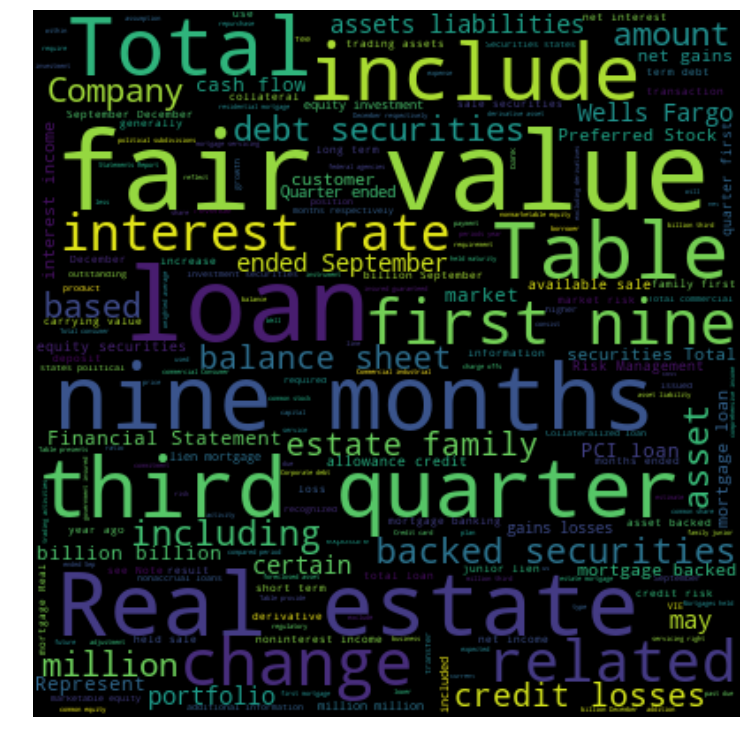

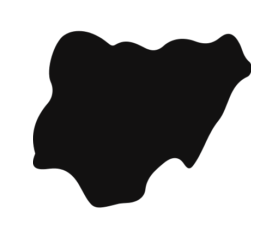

In [46]:
plt.figure(figsize=(16,13))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(raw_pic, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()